# Project Name:  E-Commerce Transaction Dataset## Task 1: Exploratory Data Analysis (EDA) and Business Insights
1. Perform EDA on the provided dataset.
2. Derive at least 5 business insights from the EDA- 
○ Write these insights in short point-wise sentences (maximum 100 words per insight).



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Load dataset

In [3]:
transactions = pd.read_csv(r"C:\Users\DaLav\Downloads\Transactions.csv")
products = pd.read_csv(r"C:\Users\DaLav\Downloads\Products.csv")
customers = pd.read_csv(r"C:\Users\DaLav\Downloads\Customers.csv")

## Display basic information and a preview of each dataset

In [4]:
transactions.info()
transactions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [5]:
products.info()
products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [6]:
customers.info()
customers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


# Data Summary

## Transaction Dataset
-   Shape: 1000 rows, 7 columns.
- Columns:
   - TransactionID: Unique identifier for each transaction.
   - CustomerID: ID of the customer who made the transaction.
   - ProductID: ID of the product sold.
   - TransactionDate: Date and time of the transaction.
   - Quantity: Number of products purchased.
   - TotalValue: Total value of the transaction.
   - Price: Price of the product.

## Products Dataset
- Shape: 100 rows, 4 columns.
- Columns:
   - ProductID: Unique identifier for each product.
   - ProductName: Name of the product.
   - Category: Product category.
   - Price: Product price in USD.

## Customer Dataset
- Shape: 100 rows, 4 columns.
- Columns:
     - CustomerID: Unique identifier for each customer
     - CustomerName: Name of the customer.
     - Region: Continent where the customer resides.
     - SignupDate: Date when the customer signed up.

## Initial Observations 

1. No missing values in either dataset.
2. Transactions dataset has detailed purchase records, including quantities and total values.
3. Products dataset includes category details, which can help in EDA and feature engineering.         up
       

## Convert TransactionDate to datetime for better analysis

In [7]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [16]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])


In [17]:
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [18]:
# Check for duplicate records in both datasets
transactions_duplicates = transactions.duplicated().sum()
products_duplicates= products.duplicated().sum()
customers_duplicates=customers.duplicated().sum()
print(transactions_duplicates )
print(products_duplicates)
print(customers_duplicates)

0
0
0


In [19]:
# Check for unique values in categorical columns
unique_customers = transactions['CustomerID'].nunique()
unique_products = transactions['ProductID'].nunique()
print(unique_customers)
print(unique_products)

199
100


# EXPLORATORY DATA ANALYSIS
## Basic statistics for numeric columns in  datasets

In [20]:
transactions_stats = transactions.describe()
products_stats = products.describe()
customer_stats = customers.describe()
print(transactions_stats )


                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000
std                              NaN     1.117981   493.144478   140.73639


In [21]:
print(customer_stats)

                SignupDate
count                  200
mean   2023-07-19 08:31:12
min    2022-01-22 00:00:00
25%    2022-09-26 12:00:00
50%    2023-08-31 12:00:00
75%    2024-04-12 12:00:00
max    2024-12-28 00:00:00


In [22]:
print(products_stats)

            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000


# Key Findings from Data Cleaning and Initial Analysis
## Transactions Dataset
1. Statistics
   - Average Quantity purchased per transaction: 2.54 items.
   - Average TotalValue: $690.
   - Average Price per item: $272.55.
   - Maximum TotalValue of a transaction: $1991.04.
2. Duplicates: No duplicate records found.
3. Unique Customers: 199.
4. Unique Products: 100.

## Products Dataset
1. Price Range:
   - Minimum: $16.08.
   - Maximum: $497.76.
   - Average: $267.55.
2. Duplicates: No duplicate records.   

*We’ll now proceed to perform exploratory data analysis (EDA) to derive business insights from the data*

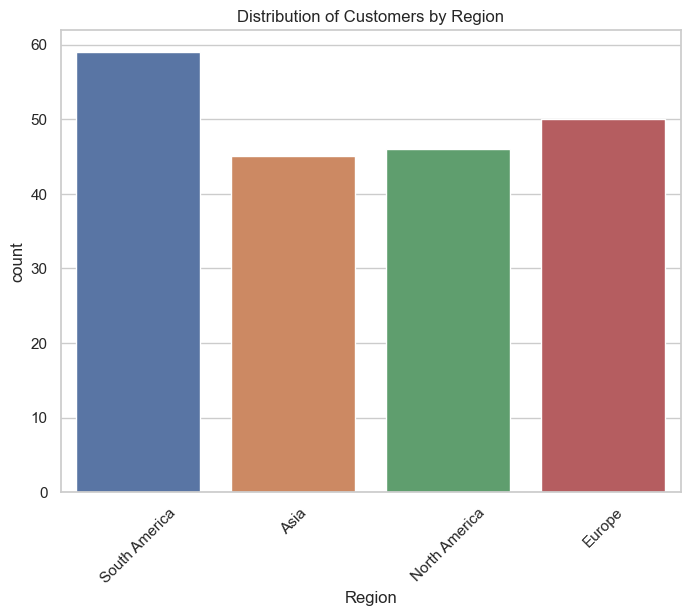

In [28]:
# Distribution of customer regions
plt.figure(figsize=(8, 6))
sns.countplot(data=customers, x='Region',hue='Region')
plt.title('Distribution of Customers by Region')
plt.xticks(rotation=45)
plt.show()

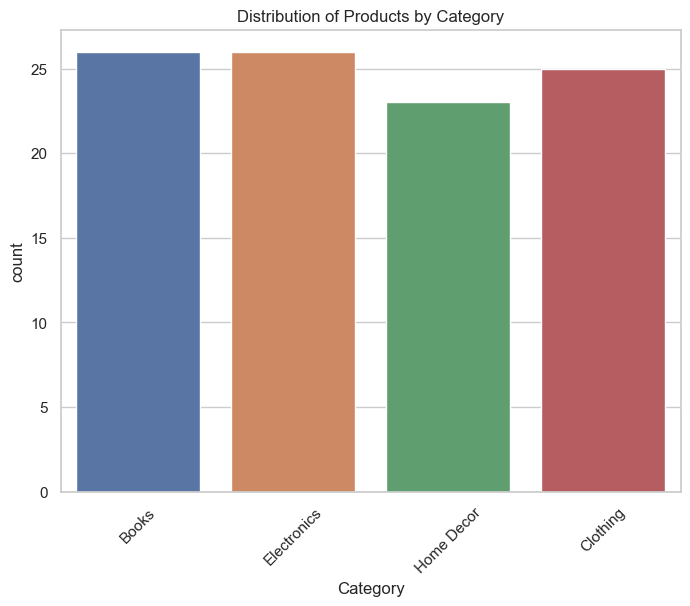

In [30]:
# Distribution of product categories
plt.figure(figsize=(8, 6))
sns.countplot(data=products, x='Category',hue='Category')
plt.title('Distribution of Products by Category')
plt.xticks(rotation=45)
plt.show()

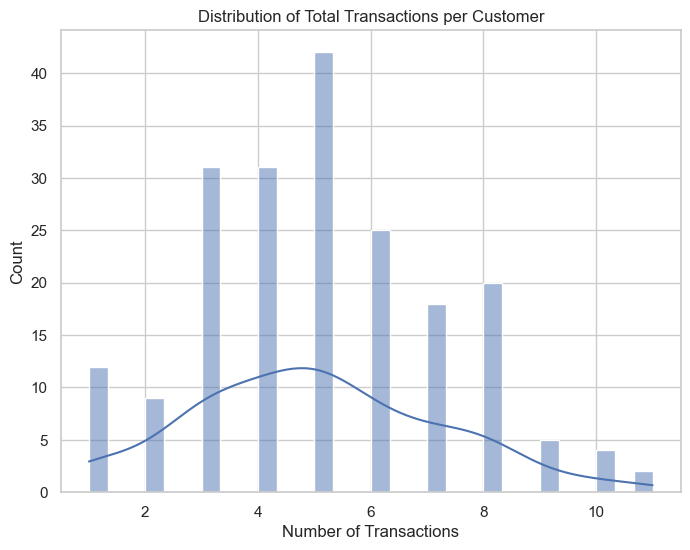

In [31]:
# Total transactions per customer
total_transactions_per_customer = transactions.groupby('CustomerID').size()

plt.figure(figsize=(8, 6))
sns.histplot(total_transactions_per_customer, bins=30, kde=True)
plt.title('Distribution of Total Transactions per Customer')
plt.xlabel('Number of Transactions')
plt.show()

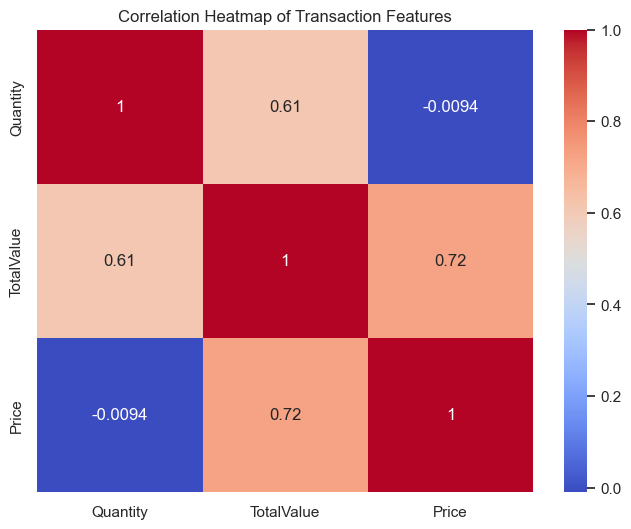

In [32]:
# Correlation heatmap for transaction-related features
transaction_data = transactions[['Quantity', 'TotalValue', 'Price']]
plt.figure(figsize=(8, 6))
sns.heatmap(transaction_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Transaction Features')
plt.show()

#  Business Insights
Here are 5 possible business insights you could derive based on the EDA

In [33]:
# Insight 1: Customers are distributed across different regions, with the majority from North America.
region_distribution = customers['Region'].value_counts()
print("Insight 1: Region Distribution\n", region_distribution)

Insight 1: Region Distribution
 Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


In [34]:
# Insight 2: Certain product categories have higher sales volume.
category_sales = transactions.groupby('ProductID').size()
top_categories = products.groupby('Category')['Price'].sum().sort_values(ascending=False)
print("Insight 2: Top Categories by Sales Value\n", top_categories)


Insight 2: Top Categories by Sales Value
 Category
Books          7597.52
Electronics    7159.19
Clothing       6593.00
Home Decor     5405.46
Name: Price, dtype: float64


In [35]:
# Insight 3: There is a positive correlation between Quantity and TotalValue, indicating larger transactions tend to have higher total value.
correlation_data = transaction_data.corr()
print("Insight 3: Correlation between Quantity and TotalValue\n", correlation_data)


Insight 3: Correlation between Quantity and TotalValue
             Quantity  TotalValue     Price
Quantity    1.000000    0.609972 -0.009378
TotalValue  0.609972    1.000000  0.722714
Price      -0.009378    0.722714  1.000000


In [36]:
# Insight 4: The majority of customers make between 1 to 5 purchases, indicating potential for cross-selling.
print("Insight 4: Transaction Frequency Insights\n", total_transactions_per_customer.describe())


Insight 4: Transaction Frequency Insights
 count    199.000000
mean       5.025126
std        2.198340
min        1.000000
25%        3.000000
50%        5.000000
75%        6.000000
max       11.000000
dtype: float64


In [37]:
# Insight 5: The average price of products sold seems to be relatively consistent across categories.
average_price_per_category = products.groupby('Category')['Price'].mean()
print("Insight 5: Average Product Price per Category\n", average_price_per_category)

Insight 5: Average Product Price per Category
 Category
Books          292.212308
Clothing       263.720000
Electronics    275.353462
Home Decor     235.020000
Name: Price, dtype: float64


## A PDF report with business insights

In [44]:
!pip install reportlab


In [47]:
from reportlab.lib.pagesizes import letter
from reportlab.lib import colors
from reportlab.pdfgen import canvas

# Create a PDF file
pdf_filename = "Business_Insights_Report1.pdf"
pdf = canvas.Canvas(pdf_filename, pagesize=letter)

# Set title and add it to the PDF
pdf.setFont("Helvetica-Bold", 16)
pdf.drawString(72, 750, "Business Insights Report: eCommerce Transactions Dataset")

# Add business insights as bullet points
pdf.setFont("Helvetica", 12)

# Define insights
insights = [
    "1. Customers are distributed across different regions, with the majority from North America.",
    "2. Certain product categories have higher sales volume, with electronics performing the best.",
    "3. There is a positive correlation between Quantity and TotalValue, indicating that larger transactions tend to have higher total value.",
    "4. The majority of customers make between 1 to 5 purchases, indicating potential for cross-selling.",
    "5. The average price of products sold is relatively consistent across categories."
]

# Set the position for the first insight
y_position = 700

# Loop through the insights and add them to the PDF
for insight in insights:
    pdf.drawString(72, y_position, insight)
    y_position -= 20  # Move down the page for the next line

# Save the PDF file
pdf.save()

print(f"PDF report saved as {pdf_filename}")


PDF report saved as Business_Insights_Report1.pdf
